# Importing Libraries 

In [1]:
# Importing all neccesary libraries
# %pip install pandas scikit-learn

import pandas as pd # Pandas
import numpy as np # Numpy
from scipy import stats # Scipy - for statistics
import matplotlib.pyplot as plt # Matplotlib - for ploting
import seaborn as sns # Seaborn - for ploting
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from tabulate import tabulate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LassoCV
from sklearn.neighbors import KNeighborsRegressor

import yfinance as yf
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import fcluster
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestRegressor


# Importing Data 

In [2]:
# Importing data 
#diebetes_df = pd.read_excel('Diabetes_Data.xlsx')
main_titanic_df = pd.read_csv('titanic3.csv')
red_wine_df = pd.read_csv('winequality-red.csv', delimiter=';')
white_wine_df = pd.read_csv('winequality-white.csv', delimiter=';')

# Tickers for all thirty stock in the Dow Jones Index
tickers = [
    "MMM", "AXP", "AMGN", "AAPL", "BA", "CAT", "CVX", "CSCO", "KO", "GS",
    "HD", "HON", "INTC", "JPM", "MCD", "MRK", "MSFT", "NKE", "PFE", "PG",
    "CRM", "TRV", "UNH", "VZ", "V", "WMT", "DIS", "WBA", "DOW", "RTX"
]
stock_df = yf.download(tickers, start="2023-01-01", end="2024-01-01")['Close']
#stock_df.tail()

[*********************100%***********************]  30 of 30 completed


# Quesiton 1

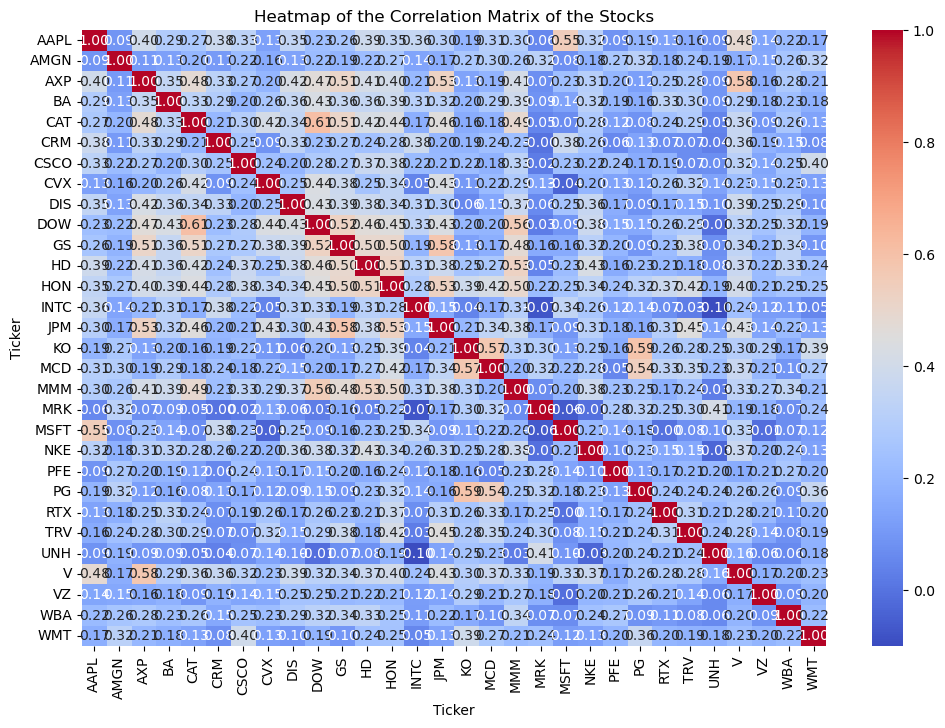

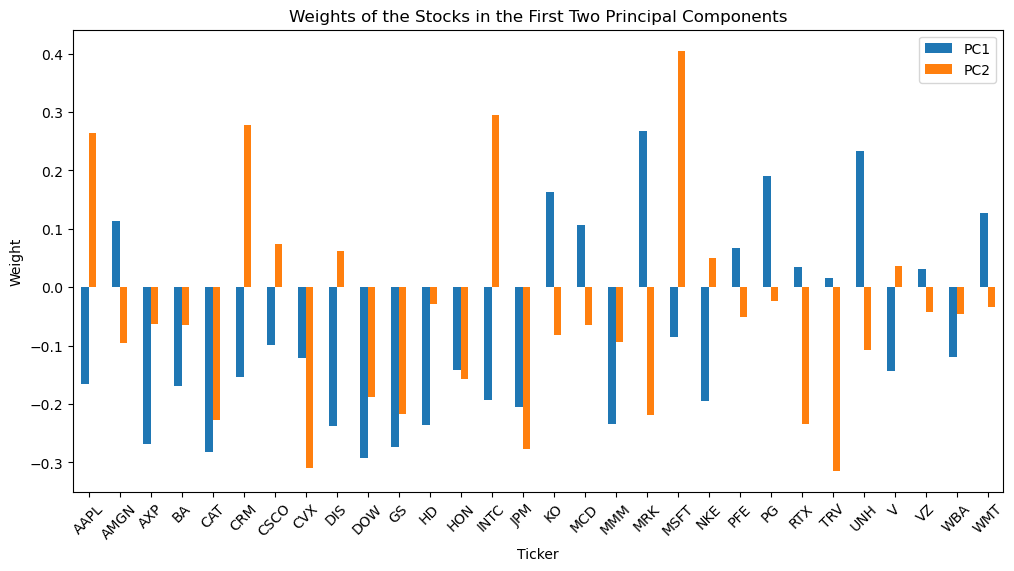

PC1     PC2     PC3    PC4    PC5    PC6    PC7    PC8    PC9    PC10    PC11    PC12    PC13    PC14    PC15    PC16    PC17    PC18    PC19    PC20    PC21    PC22    PC23    PC24    PC25    PC26    PC27    PC28    PC29    PC30
------  ------  -----  -----  -----  -----  -----  -----  -----  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------
31.58%  15.71%  9.83%  7.06%  4.91%  3.23%  3.15%  2.78%  2.32%  2.08%   1.96%   1.77%   1.71%   1.40%   1.34%   1.30%   1.16%   1.04%   0.84%   0.74%   0.67%   0.61%   0.60%   0.49%   0.47%   0.38%   0.36%   0.26%   0.25%   0.00%


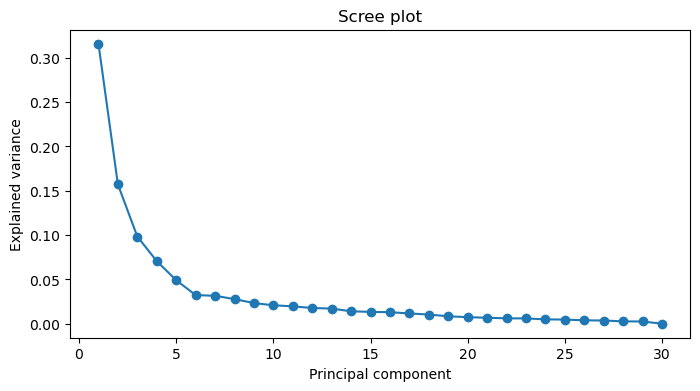

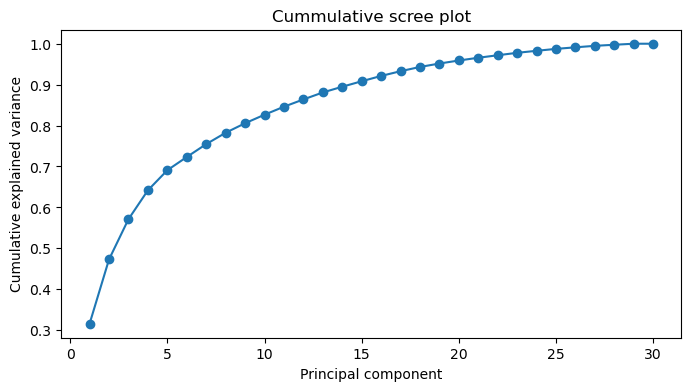

Number of principal components that explain at least 95% of the variance: 19


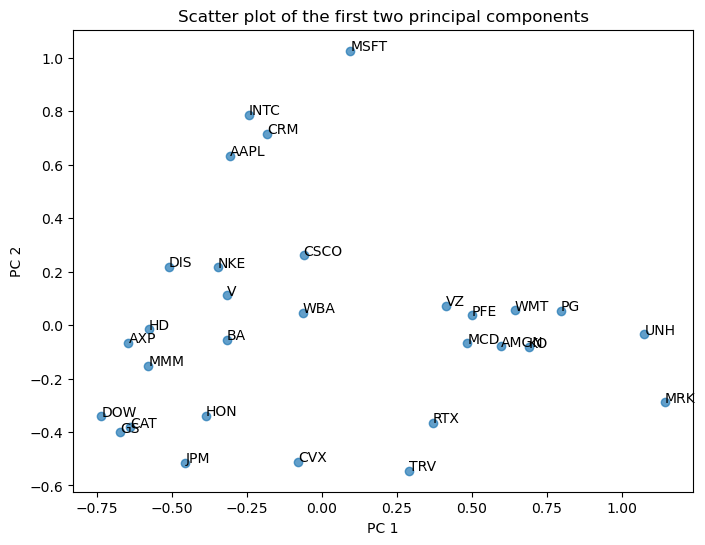

Number of principal components that explain at least 95% of the variance: 19
Three most distant stocks:
Ticker
MSFT    0.454151
MRK     0.383247
INTC    0.363497
dtype: float64


In [3]:
# Calculating the daily returns of the stocks
stock_returns = stock_df.pct_change().dropna()

# Data standardisation 
scaler = StandardScaler()  # Renamed to avoid name conflict
stock_returns_scaled = scaler.fit_transform(stock_returns)

# Covariance Matrix 
cor_matrics = stock_returns.corr()

# Heatmap of the corelation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cor_matrics, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of the Correlation Matrix of the Stocks')
plt.show()

# Explained variance by each principal component
pca = PCA()
p_component = pca.fit_transform(cor_matrics)
explained_variance = pca.explained_variance_ratio_

# Stock weights in the first two principal components
stock_weights = pd.DataFrame(pca.components_[:2].T, index=stock_returns.columns, columns=[f"PC{i+1}" for i in range(2)])

# Bar graphs of the loadings (weights of each stock in PC1 and PC2)
stock_weights.plot(kind='bar', figsize=(12, 6))
plt.ylabel('Weight')
plt.title('Weights of the Stocks in the First Two Principal Components')
plt.xticks(rotation=45)
plt.show()

"""
# Explained variance by each principal component
print("Explained variance by each principal component:")
for i, variance in enumerate(explained_variance, 1):
    print(f"PC {i}: {variance * 100:.2f}%")
"""

"""
plt.figure(figsize=(12, 8))
plt.scatter(p_component[:, 0], stock_returns.mean(), alpha=0.7)
#plt.scatter(p_component[:, 1], stock_returns.mean(), alpha=0.7)
plt.xlabel('PC 1')
plt.ylabel('Stock returns')
plt.title('Weight of Stock Returns Against First Principal Component')
plt.show()

# Stock returns against PC2
plt.figure(figsize=(12, 8))
plt.scatter(p_component[:, 1], stock_returns.mean(), alpha=0.7)
plt.xlabel('PC 2')
plt.ylabel('Stock returns')
plt.title('Weight of Stock Returns Against Second Principal Component')
plt.show()
"""

# Printing the explained variance by each principal component in a table
print(tabulate([[f"PC{i}" for i in range(1, len(explained_variance) + 1)], 
                [f"{variance * 100:.2f}%" for variance in explained_variance]], 
               headers="firstrow"))

# Scree plot of principal components
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', label='Explained variance')
plt.xlabel('Principal component')
plt.ylabel('Explained variance')
plt.title('Scree plot')
plt.show()

# Cummulative scree plot of principal components
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', label='Cumulative explained variance')
plt.xlabel('Principal component')
plt.ylabel('Cumulative explained variance')
plt.title('Cummulative scree plot')
plt.show()

# Cumulative explained variance for selecting number of components
cumulative_explained_variance = np.cumsum(explained_variance)
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"Number of principal components that explain at least 95% of the variance: {n_components}")

# Color map for various stocks
#cmap = plt.cm.plasma
#num_stocks = len(stock_returns_scaled)
#colors = cmap(np.linspace(0, 1, num_stocks))

# Scatter plot of the first two principal components
#principal_components = pca.transform(stock_returns)
plt.figure(figsize=(8, 6))
plt.scatter(p_component[:, 0], p_component[:, 1], alpha=0.7)
for i, stock in enumerate(stock_returns.columns):
    plt.annotate(stock, (p_component[i, 0], p_component[i, 1]), color='black')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Scatter plot of the first two principal components')
plt.show()

# Number of principal components that explain at least 95% of the variance
cumulative_explained_variance = np.cumsum(explained_variance)
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"Number of principal components that explain at least 95% of the variance: {n_components}")

# Average of stoks on the first two principal components
avg_pc = stock_weights.mean()

# Stock distances from the average on the first two principal components using Euclidean distance
stock_distances = np.sqrt(((stock_weights - avg_pc) ** 2).sum(axis=1))

# Three most distant stocks from the average on the first two principal components
top3_distant_stocks = stock_distances.nlargest(3) 
print("Three most distant stocks:")
print(top3_distant_stocks)


# Question 2

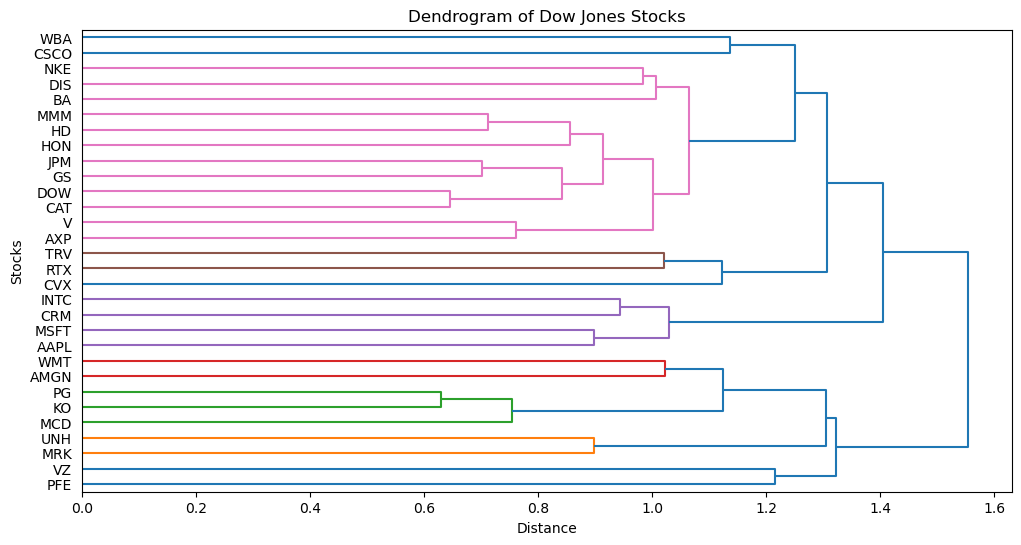

Stock pair: KO - PG, Distance   : 0.6307
Stock pair: CAT - DOW, Distance   : 0.6461
Stock pair: GS - JPM, Distance   : 0.7026
Stock pair: HD - MMM, Distance   : 0.7121
Stock pair: MCD - Cluster 0, Distance   : 0.7543
Stock pair: AXP - V, Distance   : 0.7607
Stock pair: Cluster 1 - Cluster 2, Distance   : 0.8416
Stock pair: HON - Cluster 3, Distance   : 0.8568
Stock pair: AAPL - MSFT, Distance   : 0.8975
Stock pair: MRK - UNH, Distance   : 0.8979
Stock pair: Cluster 6 - Cluster 7, Distance   : 0.9144
Stock pair: CRM - INTC, Distance   : 0.9432
Stock pair: DIS - NKE, Distance   : 0.9835
Stock pair: Cluster 5 - Cluster 10, Distance   : 1.0020
Stock pair: BA - Cluster 12, Distance   : 1.0078
Stock pair: RTX - TRV, Distance   : 1.0202
Stock pair: AMGN - WMT, Distance   : 1.0223
Stock pair: Cluster 8 - Cluster 11, Distance   : 1.0291
Stock pair: Cluster 13 - Cluster 14, Distance   : 1.0657
Stock pair: CVX - Cluster 15, Distance   : 1.1221
Stock pair: Cluster 4 - Cluster 16, Distance   : 1.12

In [4]:
# Calculating the distance matrix of stcks using the Euclidean distance
distance_matrix = pdist(cor_matrics, metric='euclidean')
#print(distance_matrix)

# Perform hierarchical clustering
linkage_matrix = linkage(distance_matrix, method='average')

# Plot dendrogram using the linkage matrix and stock names
plt.figure(figsize=(12, 6))
#dendrogram(linkage_matrix, labels=stock_returns.columns, leaf_rotation=90)
dendrogram(linkage_matrix, labels=stock_returns.columns, leaf_rotation=0, orientation='right')
plt.title('Dendrogram of Dow Jones Stocks')
plt.ylabel('Stocks')
plt.xlabel('Distance')
plt.show()

# Extracting the cluster pairs and their corresponding distances
stock_names = stock_returns.columns
for i in range(linkage_matrix.shape[0]):
    # Get the indices of the two stocks (or clusters) being merged
    stock1_idx = int(linkage_matrix[i, 0])
    stock2_idx = int(linkage_matrix[i, 1])
    
    # Geting the corresponding stock names
    stock1_name = stock_names[stock1_idx] if stock1_idx < len(stock_names) else f"Cluster {stock1_idx - len(stock_names)}"
    stock2_name = stock_names[stock2_idx] if stock2_idx < len(stock_names) else f"Cluster {stock2_idx - len(stock_names)}"
    
    # Distance
    distance = linkage_matrix[i, 2]
    
    print(f"Stock pair: {stock1_name} - {stock2_name}, Distance   : {distance:.4f}")



Cluster 1: PFE, VZ
Cluster 2: MRK, UNH
Cluster 3: AMGN, KO, MCD, PG, WMT
Cluster 4: AAPL, CRM, INTC, MSFT
Cluster 5: CVX, RTX, TRV
Cluster 6: AXP, BA, CAT, CSCO, DIS, DOW, GS, HD, HON, JPM, MMM, NKE, V, WBA


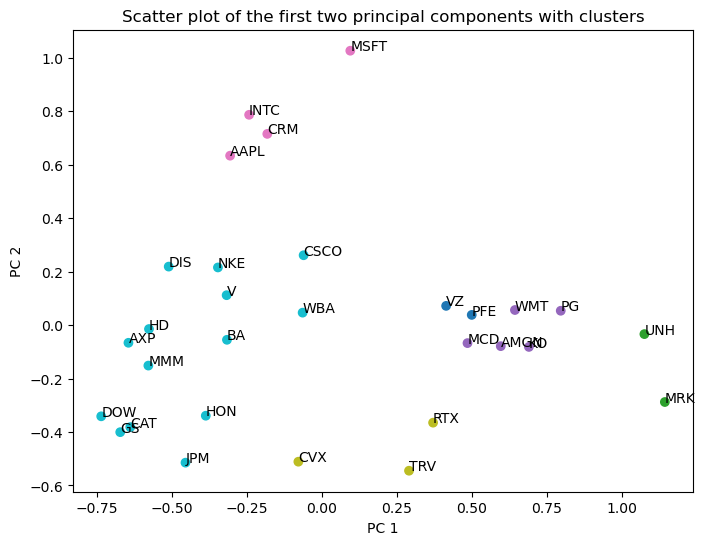

In [5]:
# Profiling the clusters (Assigning the stocks to clusters)
n_clusters = 6
clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

# Printing the stocks in each cluster
for cluster in range(1, n_clusters + 1):
    stocks_in_cluster = stock_names[clusters == cluster]
    print(f"Cluster {cluster}: {', '.join(stocks_in_cluster)}")


# Scatter plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(p_component[:, 0], p_component[:, 1], c=clusters, cmap='tab10')
#Annotating the clusters
for i, stock in enumerate(stock_returns.columns):
    plt.annotate(stock, (p_component[i, 0], p_component[i, 1]), color='black')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Scatter plot of the first two principal components with clusters')
plt.show()



# Question 3

C:\Users\STUDENT\AppData\Local\Temp\ipykernel_48672\1773787445.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['sex'] = titanic_df['sex'].map({'male': 0, 'female': 1})
C:\Users\STUDENT\AppData\Local\Temp\ipykernel_48672\1773787445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['age'] = titanic_df['age'].fillna(titanic_df['age'].mean())


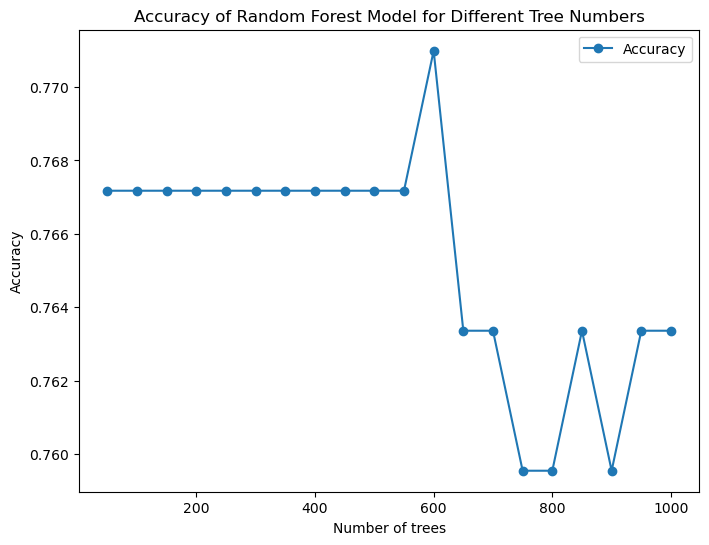

Best number of trees: 600
Best accuracy: 0.77
Random Forest Accuracy: 0.77
Linear Regression Accuracy: 0.77
Decision Tree Accuracy: 0.78
KNN Accuracy: 0.73


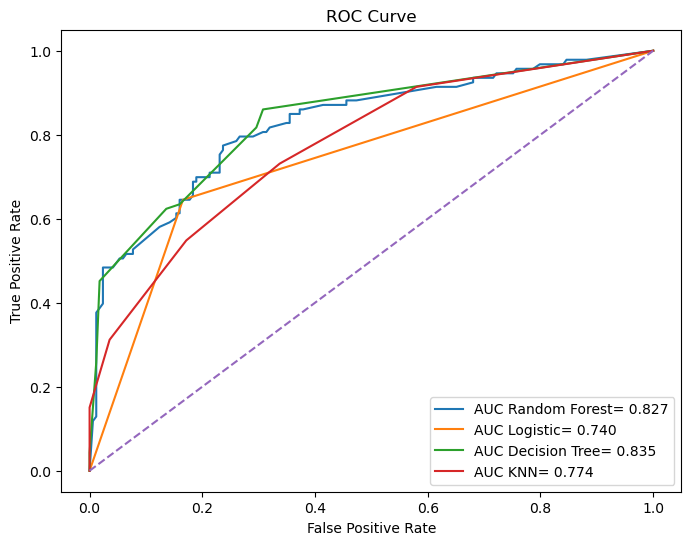

In [6]:
# Selecting relevant features and organising data
titanic_df = main_titanic_df[['age', 'sex', 'pclass', 'survived']]
titanic_df['sex'] = titanic_df['sex'].map({'male': 0, 'female': 1})
#titanic_df = pd.get_dummies(titanic_df, columns=['pclass'], drop_first=True)
titanic_df['age'] = titanic_df['age'].fillna(titanic_df['age'].mean())

X = titanic_df.drop(columns=['survived'])
y = titanic_df['survived']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# Number of trees 
n_trees = list(range(50, 1001, 50))
tree_accuracies = []

# Building a random forest model for each number of trees
for n_tree in n_trees:
    # Random forest model
    rf = RandomForestClassifier(n_estimators=n_tree, random_state=1)
    
    # Splitting the data into training and testing sets
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    # Fitting the model
    rf.fit(X_train, y_train)
    
    # Predicting the clusters
    y_pred = rf.predict(X_test).round()
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    tree_accuracies.append(accuracy)

# Plotting the accuracy of the random forest model for each number of trees
plt.figure(figsize=(8, 6))
plt.plot(n_trees, tree_accuracies, marker='o', label='Accuracy')
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.title('Accuracy of Random Forest Model for Different Tree Numbers')
plt.legend()
plt.show()

# Selecting the best number of trees
optimal_n_tree = n_trees[np.argmax(tree_accuracies)]
print(f"Best number of trees: {optimal_n_tree}")
print(f"Best accuracy: {max(tree_accuracies):.2f}")

# Random forest model with the best number of trees
optimal_rf = RandomForestClassifier(n_estimators=optimal_n_tree, random_state=1)
optimal_rf.fit(X_train, y_train)
# Linear regression model
linear_reg = LogisticRegression(max_iter=1000, random_state=16)
linear_reg.fit(X_train, y_train) 
# Classification tree 
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
decision_tree.fit(X_train, y_train)   
# KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predicting the clusters
y_pred = optimal_rf.predict(X_test)
y_pred_linear = linear_reg.predict(X_test)
y_pred_tree = decision_tree.predict(X_test)
y_pred_knn = knn.predict(X_test)


# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")
accuracy_linear = accuracy_score(y_test, y_pred_linear.round()) 
print(f"Linear Regression Accuracy: {accuracy_linear:.2f}")
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy_tree:.2f}")
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")


# Probability estimates of the positive class
y_pred_prob = optimal_rf.predict_proba(X_test)[:, 1]  
y_pred_prob_linear = linear_reg.predict(X_test) 
y_pred_prob_tree = decision_tree.predict_proba(X_test)[:, 1]
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]


# ROC curve - Random Forest
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
# ROC curve - Linear Regression
fpr_linear, tpr_linear, thresholds_linear = roc_curve(y_test, y_pred_prob_linear)
roc_auc_linear = auc(fpr_linear, tpr_linear)
# ROC curve - Decision Tree
fp_tree, tp_tree, thresholds_tree = roc_curve(y_test, y_pred_prob_tree)
roc_auc_tree = auc(fp_tree, tp_tree)
# ROC curve - KNN
fp_knn, tp_knn, thresholds_knn = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = auc(fp_knn, tp_knn)


# Plotting the ROC curve 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC Random Forest= {roc_auc:.3f}')
plt.plot(fpr_linear, tpr_linear, label=f'AUC Logistic= {roc_auc_linear:.3f}')
plt.plot(fp_tree, tp_tree, label=f'AUC Decision Tree= {roc_auc_tree:.3f}')
plt.plot(fp_knn, tp_knn, label=f'AUC KNN= {roc_auc_knn:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Question 4

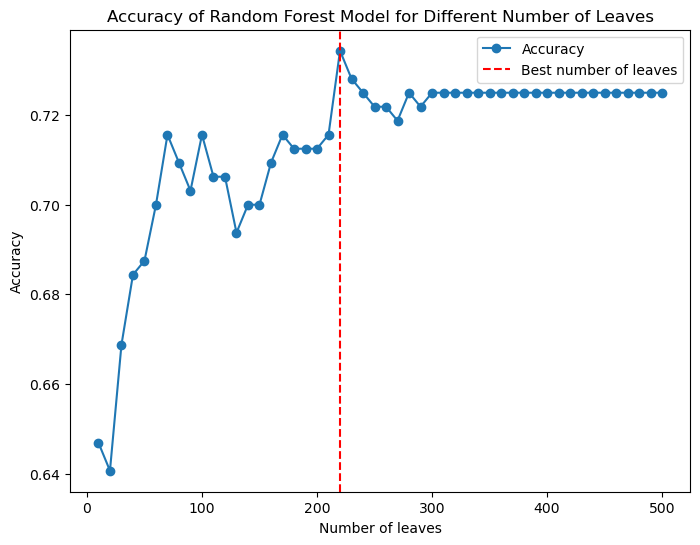

Best number of leaves for red wine: 220
Best number of trees for red wine: 200
Best accuracy for red wine: 0.73


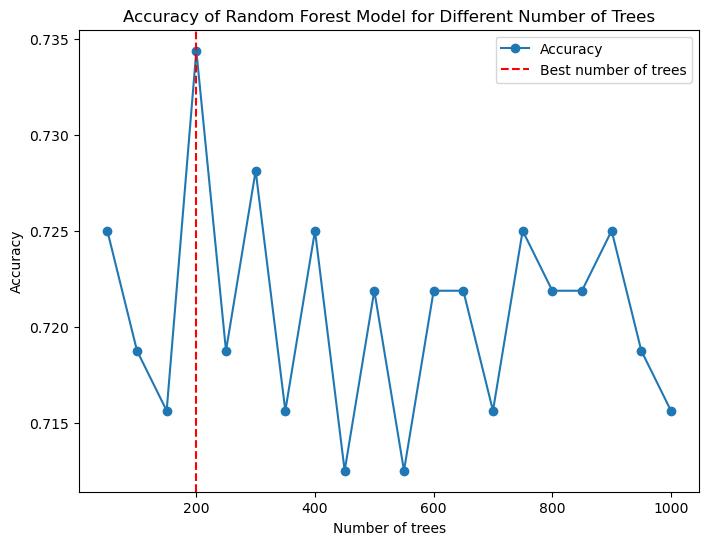

Random Forest Accuracy for Red Wine: 0.72
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.75      0.83      0.79       140
           6       0.72      0.75      0.73       134
           7       0.57      0.43      0.49        30
           8       1.00      0.50      0.67         2

    accuracy                           0.72       320
   macro avg       0.50      0.42      0.45       320
weighted avg       0.69      0.72      0.70       320

MSE for Red Wine: 0.37
Accuracy for Red Wine: 0.72
R-squared for Red Wine: 0.72


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


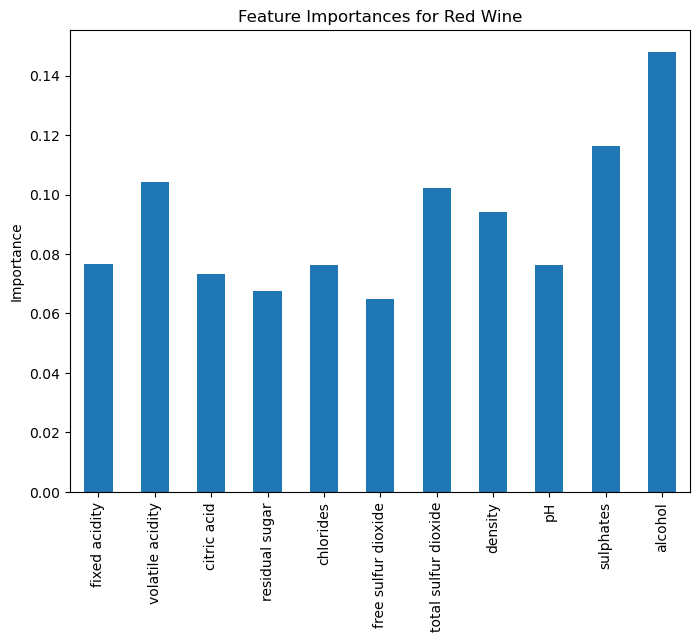

In [7]:
# Dependent variable
Y_red = red_wine_df['quality']
Y_white = white_wine_df['quality']

# Independent variables
X_red = red_wine_df.drop(columns='quality')
X_white = white_wine_df.drop(columns='quality')

#scaler = StandardScaler()
#X_red_scaled = scaler.fit_transform(X_red)

# Splitting the data into training and testing sets
X_train_red, X_test_red, Y_train_red, Y_test_red = train_test_split(X_red, Y_red, test_size=0.2, random_state=1)
X_train_white, X_test_white, Y_train_white, Y_test_white = train_test_split(X_white, Y_white, test_size=0.2, random_state=1)

# Verifying the optimal number of leaves for random forest for red wine
n_leaves = list(range(10, 501, 10))
leaf_accuracies_red = []

# Building a random forest model for each number of leaves
for n_leaf in n_leaves:
    # Model
    rf = RandomForestClassifier(max_leaf_nodes=n_leaf, random_state=1)
    
    # Fitting the model
    rf.fit(X_train_red, Y_train_red)
    
    # Predicting the clusters
    Y_pred = rf.predict(X_test_red)
    
    # Accuracy
    accuracy = accuracy_score(Y_test_red, Y_pred)
    leaf_accuracies_red.append(accuracy)


# Selecting the best number of leaves
optimal_n_leaf = n_leaves[np.argmax(leaf_accuracies_red)]

# Plotting the accuracy of the random forest model for each number of leaves
plt.figure(figsize=(8, 6))
plt.plot(n_leaves, leaf_accuracies_red, marker='o', label='Accuracy')
plt.axvline(optimal_n_leaf, color='red', linestyle='--', label='Best number of leaves')
plt.xlabel('Number of leaves')
plt.ylabel('Accuracy')
plt.title('Accuracy of Random Forest Model for Different Number of Leaves')
plt.legend()
plt.show()

print(f"Best number of leaves for red wine: {optimal_n_leaf}") 

# Choosing best number of trees for red wine
trees = list(range(50, 1001, 50))
tree_accuracies_red = []
for tree in trees:
    rf = RandomForestClassifier(n_estimators=tree, max_leaf_nodes=optimal_n_leaf)
    rf.fit(X_train_red, Y_train_red)
    Y_pred = rf.predict(X_test_red)
    accuracy = accuracy_score(Y_test_red, Y_pred)
    tree_accuracies_red.append(accuracy)

# Selecting the best number of trees
optimal_n_tree_red = trees[np.argmax(tree_accuracies_red)]
print(f"Best number of trees for red wine: {optimal_n_tree_red}")
print(f"Best accuracy for red wine: {max(tree_accuracies_red):.2f}")


# Plotting the accuracy of the random forest model for each number of trees
plt.figure(figsize=(8, 6))
plt.plot(trees, tree_accuracies_red, marker='o', label='Accuracy')
plt.axvline(optimal_n_tree_red, color='red', linestyle='--', label='Best number of trees')
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.title('Accuracy of Random Forest Model for Different Number of Trees')
plt.legend()
plt.show()


# Random forest model with the best number of trees
rf_red = RandomForestClassifier(n_estimators=optimal_n_tree_red, max_leaf_nodes=optimal_n_leaf, random_state=1)
rf_red.fit(X_train_red, Y_train_red)

# Model accuracy for red wine
Y_pred_red = rf_red.predict(X_test_red)
accuracy_red = accuracy_score(Y_test_red, Y_pred_red)
print(f"Random Forest Accuracy for Red Wine: {accuracy_red:.2f}")

# Model evaluation for red wine
print(classification_report(Y_test_red, Y_pred_red))

mse_red = np.mean((Y_test_red - Y_pred_red) ** 2)
print(f"MSE for Red Wine: {mse_red:.2f}")
accuracy_red = accuracy_score(Y_test_red, Y_pred_red)
print(f"Accuracy for Red Wine: {accuracy_red:.2f}")
r_squared_red = rf_red.score(X_test_red, Y_test_red)
print(f"R-squared for Red Wine: {r_squared_red:.2f}")


# Feature importances for red wine
feature_importances_red = rf_red.feature_importances_
feature_importances_red = pd.Series(feature_importances_red, index=X_red.columns)

# Plotting the feature importances
plt.figure(figsize=(8, 6))
feature_importances_red.plot(kind='bar')
plt.ylabel('Importance')
plt.title('Feature Importances for Red Wine')
plt.show()






In [8]:
# Performance of the random forest model for red wine
print("Random forest regession model performance for red wine:\n")
mse_red = np.mean((Y_test_red - Y_pred_red) ** 2)
print(f"MSE for Red Wine: {mse_red:.2f}")
accuracy_red = accuracy_score(Y_test_red, Y_pred_red)
print(f"Accuracy for Red Wine: {accuracy_red:.2f}")
r_squared_red = rf_red.score(X_test_red, Y_test_red)
print(f"R-squared for Red Wine: {r_squared_red:.2f}")


Random forest regession model performance for red wine:

MSE for Red Wine: 0.37
Accuracy for Red Wine: 0.72
R-squared for Red Wine: 0.72


#KAGGLE